In [1]:
import time
start_time=time.time()

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import pandas as pd
import math
import sys
import os
from PIL import Image
import seaborn as sns
from scipy import interpolate
from sabreMod import sosf,sosfn

Sigma

In [3]:
#ARCHIVO
reg='604'
FitsFile= 'Obs/TAURUS.604.O.Sigma'
hdul=fits.open(FitsFile + '.fits')

Text(0.5, 1.0, '[OIII] σ$_{disp}$')

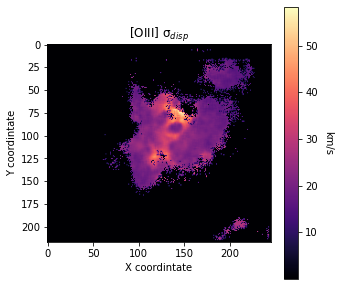

In [4]:
#IMAGEN S
fig, ax = plt.subplots(figsize=(5, 5))
image_data=hdul[0].data
plt.imshow(image_data, cmap='magma')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.title('[OIII] σ$_{disp}$')


#plt.savefig('TAURUS/'+reg+'SO.png')

In [5]:
#TABLA DATOS
sig=hdul[0].data
df=pd.DataFrame(sig)

In [6]:
#df=df.reindex(index=df.index[::-1])

In [7]:
dsig=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'Sig'})
dsig.describe()

,Y,X,Sig
count,53165.000000,53165.000000,5.316500e+04
mean,108.000000,122.000000,4.433354e+00
std,62.642428,70.725484,9.644502e+00
min,0.000000,0.000000,1.457178e-08
25%,54.000000,61.000000,1.457178e-08
50%,108.000000,122.000000,1.457178e-08
75%,162.000000,183.000000,1.457178e-08
max,216.000000,244.000000,5.829112e+01


In [8]:
#dsig.Sig=dsig.Sig.values[::-1]
#dsig.describe()

Brillo emisión

In [9]:
#ARCHIVO
FitsFile= 'Obs/TAURUS.604.O.Flux'
hdul=fits.open(FitsFile + '.fits')

Text(0.5, 1.0, '[OIII] Flux')

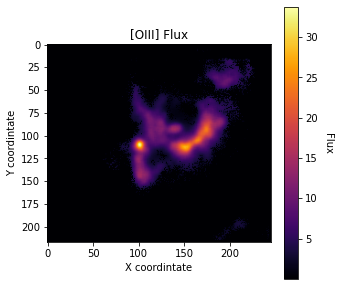

In [10]:
#IMAGEN
fig, ax = plt.subplots(figsize=(5, 5))


image_data=hdul[0].data
plt.imshow(image_data, cmap='inferno')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('Flux', rotation=270, labelpad=15)  
plt.title('[OIII] Flux')


#plt.savefig('TAURUS/'+reg+'FO.png')

In [11]:
#TABLA DATOS
flx=hdul[0].data
df=pd.DataFrame(flx)

In [12]:
dffx=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'I'})
dffx.describe()

,Y,X,I
count,53165.000000,53165.000000,5.316500e+04
mean,108.000000,122.000000,1.296366e+00
std,62.642428,70.725484,3.449498e+00
min,0.000000,0.000000,8.434807e-09
25%,54.000000,61.000000,8.434807e-09
50%,108.000000,122.000000,8.434807e-09
75%,162.000000,183.000000,8.434807e-09
max,216.000000,244.000000,3.374002e+01


Velocidad Radial

In [13]:
#ARCHIVO
FitsFile= FitsFile= 'Obs/TAURUS.604.O.RV'
#FitsFile= 'n604halphasigma'
hdul=fits.open(FitsFile + '.fits')

Text(0.5, 1.0, '[OIII] Radial Velocity')

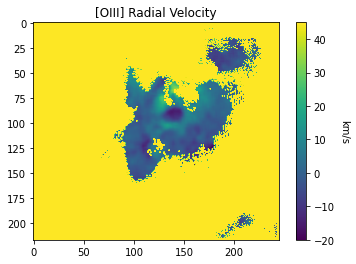

In [14]:
#IMAGEN
image_data=hdul[0].data
plt.imshow(image_data, cmap='viridis')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
cbar = plt.colorbar()
cbar.set_label('km/s', rotation=270, labelpad=15)  
plt.clim(-20,45) 
plt.title('[OIII] Radial Velocity')

#plt.savefig('TAURUS/'+reg+'RVO.png')

In [15]:
#TABLA DATOS
vel=hdul[0].data
df=pd.DataFrame(vel)
#dfv=df.stack()
#dfv

In [16]:
dfvr=df.stack().reset_index().rename(columns={'level_0':'Y', 'level_1':'X', 0:'RV'})
dfvr.describe()

,Y,X,RV
count,53165.000000,53165.000000,53165.000000
mean,108.000000,122.000000,159.964736
std,62.642428,70.725484,76.438049
min,0.000000,0.000000,-20.419067
25%,54.000000,61.000000,196.610001
50%,108.000000,122.000000,196.610001
75%,162.000000,183.000000,196.610001
max,216.000000,244.000000,196.610001


Tabla General

In [17]:
data=dfvr
data['I']=dffx.I
data['Sig']=dsig.Sig
data.describe()

,Y,X,RV,I,Sig
count,53165.000000,53165.000000,53165.000000,5.316500e+04,5.316500e+04
mean,108.000000,122.000000,159.964736,1.296366e+00,4.433354e+00
std,62.642428,70.725484,76.438049,3.449498e+00,9.644502e+00
min,0.000000,0.000000,-20.419067,8.434807e-09,1.457178e-08
25%,54.000000,61.000000,196.610001,8.434807e-09,1.457178e-08
50%,108.000000,122.000000,196.610001,8.434807e-09,1.457178e-08
75%,162.000000,183.000000,196.610001,8.434807e-09,1.457178e-08
max,216.000000,244.000000,196.610001,3.374002e+01,5.829112e+01


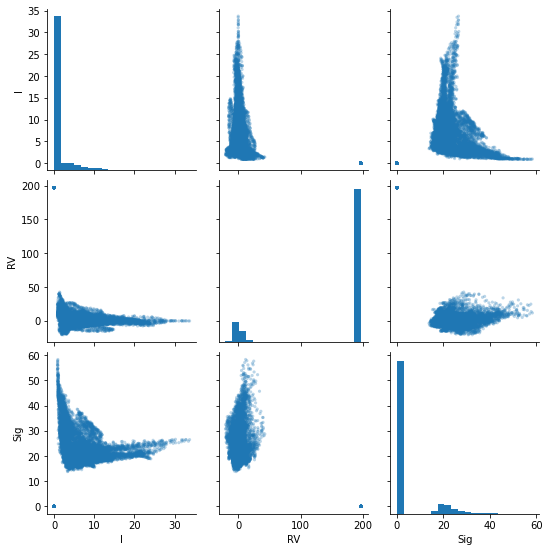

In [18]:
sns.pairplot(data, 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

Ajuste de datos

In [19]:
#mI=(data.I>data.I.mean()+0.1*data.I.std())&(data.Sig>data.Sig.mean()+0.1*data.Sig.std())

In [20]:
mI=(data.I>0.01)#&(data.RV<100)&(data.Sig>2)

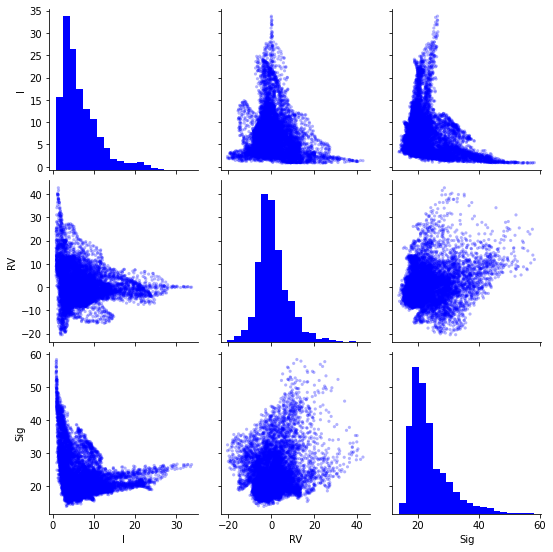

In [21]:
sns.pairplot(data[mI], 
             vars=["I","RV","Sig"], 
             diag_kind='hist',  
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none',color='blue'),
             diag_kws=dict(bins=20, color="blue"),
            )

#plt.savefig('TAURUS/'+reg+'CorrlHO.png')

In [22]:
data[mI].describe()

,Y,X,RV,I,Sig
count,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000
mean,93.098794,146.934372,0.806432,6.926762,23.688366
std,36.468470,36.442206,7.407126,4.957822,6.393887
min,5.000000,61.000000,-20.419067,0.831013,13.826577
25%,69.000000,115.000000,-3.625504,3.413030,19.352822
50%,94.000000,144.000000,-0.407211,5.422667,21.840129
75%,118.000000,178.000000,4.156876,9.048186,26.154775
max,214.000000,242.000000,42.600693,33.740025,58.291119


In [23]:
data[mI].sem()

Y      0.365600
X      0.365337
RV     0.074257
I      0.049703
Sig    0.064099
dtype: float64

In [24]:
data=data[mI]

Text(0.5, 1.0, '[OIII] Flux')

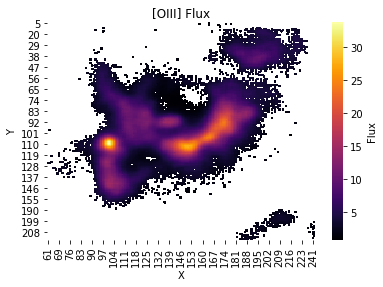

In [25]:
datal=data.copy()
#datal.I=np.log10(datal.I)
datal.X=datal.X.astype(int)
dataH_f=(datal.round(2)).pivot(index='Y', columns='X', values='I')
sns.heatmap(dataH_f, cmap="inferno",xticklabels='auto',cbar_kws={'label': 'Flux'})
plt.title('[OIII] Flux')

#plt.savefig('TAURUS/Imgs/A/'+reg+'FO.png')

Text(0.5, 1.0, '[OIII] Radial Velocity')

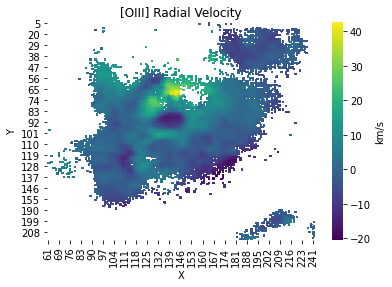

In [26]:
datal=data.copy()
dataH_rv=(datal.round(2)).pivot(index='Y', columns='X', values='RV')
sns.heatmap(dataH_rv, cmap="viridis",cbar_kws={'label': 'km/s'})
plt.title('[OIII] Radial Velocity')

#plt.savefig('TAURUS/Imgs/A/'+reg+'RVO.png')

Text(0.5, 1.0, '[OIII] σ$_{disp}$')

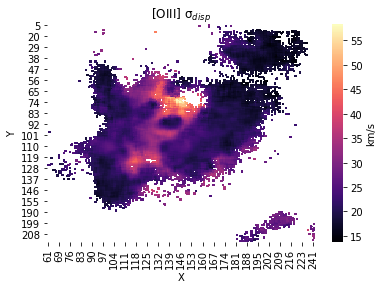

In [27]:
datal=data.copy()
dataH_s=(datal.round(2)).pivot(index='Y', columns='X', values='Sig')
sns.heatmap(dataH_s, cmap="magma",cbar_kws={'label': 'km/s'})
plt.title('[OIII] σ$_{disp}$')
#plt.savefig('TAURUS/Imgs/A/'+reg+'SO.png')

In [28]:
data.Sig=(data.Sig**2-2.44**2-13.5**2)**0.5

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0, 0.5, '$σ_{disp}$ [km/s]')

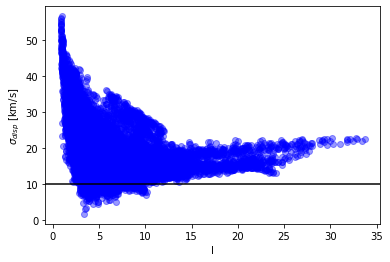

In [29]:
fig, ax = plt.subplots()
plt.scatter(data.I,data.Sig, alpha=0.4,color='blue')
#plt.title(LineN[i])
plt.axhline(y=10, color='k', linestyle='-')
#plt.axhline(y=26, color='k', linestyle='--')
#plt.axhline(y=23.6, color='k', linestyle='-.')
#plt.axhline(y=13.6, color='k', linestyle=':')


ax.set_xlabel('I')
ax.set_ylabel('$σ_{disp}$ [km/s]')

In [30]:
pc=1.05

1.0


[None, None]

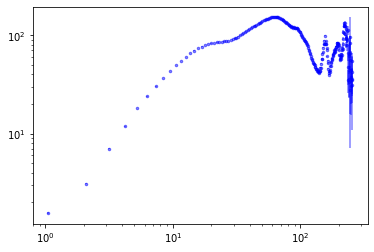

In [31]:
SF=sosf(data)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [32]:
x=SF['Lag']
y=SF['Nmqvd']-(data["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:732: RuntimeWarning: The number of zeros exceeds mest
  warnings.warn(RuntimeWarning("The number of zeros exceeds mest"))


array([ 11.55812606, 124.23180903, 146.55524557, 163.87353148,
       176.11362289, 235.90076007, 236.96835269, 237.87656242,
       238.74960426, 239.6531114 ])

In [33]:
s=SFr[0]

In [34]:
ss=np.round((data['RV'].std())**2,2)

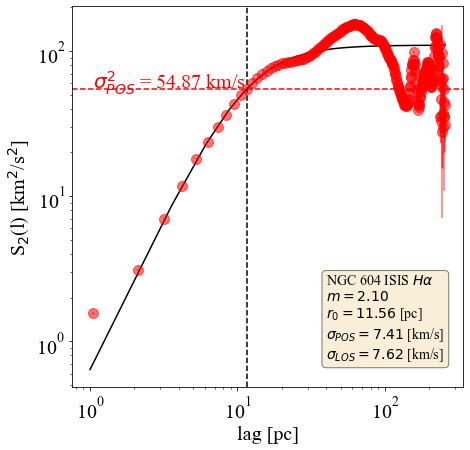

In [37]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.55, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=2.1

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('NGC 604 ISIS ' r'$Hα$' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (data["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(data["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [36]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 1403.755300283432 seconds ---
